In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('human.csv', encoding='cp949')
df.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
mdf = df.copy()

In [4]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   30725 non-null  object
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  object
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  object
 7   직업      30718 non-null  object
 8   관계      32561 non-null  object
 9   인종      32561 non-null  object
 10  성별      32561 non-null  object
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 파생변수 추가(예측전)

In [5]:
# 나이2 파생변수 추가
mdf['나이'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: 나이, Length: 73, dtype: int64

In [6]:
mdf['나이'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: 나이, dtype: float64

In [7]:
mdf.loc[mdf['나이'] <= 37, '나이2'] = 'young'
mdf.loc[mdf['나이'] > 37, '나이2'] = 'old'
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,나이2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,old
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,old
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,old
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,old
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,young
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,old
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,old
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,young


In [8]:
# 학력2 파생변수 생성 h1, h2
mdf['학력'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: 학력, dtype: int64

In [9]:
mdf.loc[(mdf['학력'] == ' HS-grad') | (mdf['학력'] == ' HS-grad') |
        (mdf['학력'] == ' Bachelors') | (mdf['학력'] == ' Masters') |
        (mdf['학력'] == ' Assoc-voc') | (mdf['학력'] == ' Assoc-acdm') |
        (mdf['학력'] == ' Prof-school') | (mdf['학력'] == ' Doctorate') |
        (mdf['학력'] == ' Preschool'), '학력2'] = 'h1'
mdf.loc[(mdf['학력'] == ' 11th') | (mdf['학력'] == ' 10th') |
        (mdf['학력'] == ' 7th-8th') | (mdf['학력'] == ' 9th') |
        (mdf['학력'] == ' 12th') | (mdf['학력'] == ' 5th-6th') |
        (mdf['학력'] == ' 1st-4th'), '학력2'] = 'h2'
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,나이2,학력2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,old,h1
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,old,h1
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,old,h1
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,old,h2
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,young,h1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,young,h1
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,old,h1
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,old,h1
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,young,h1


In [10]:
mdf['노동 계급'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: 노동 계급, dtype: int64

In [11]:
# one-hot 인코딩
mdf_n2 = pd.get_dummies(mdf['나이2'])
mdf_n2.head()

,old,young
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
mdf = pd.concat([mdf, mdf_n2], axis=1)
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,old,h1,1,0
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,old,h1,1,0
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,old,h1,1,0
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,old,h2,1,0
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,young,h1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,young,h1,0,1
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,old,h1,1,0
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,old,h1,1,0
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,young,h1,0,1


In [13]:
# 결측치 처리
#mdf = mdf.dropna(subset=['노동 계급', '직업', '모국'])
#mdf.shape

In [14]:
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', 
       '인종', '성별', '모국', '나이2', '학력2']
mdf[obj] = mdf[obj].apply(lambda x: x.astype('category').cat.codes)
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,0,1,0
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0,1,0
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0,1,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,1,1,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,1,0,0,1


In [15]:
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,0,1,0
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0,1,0
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0,1,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,1,1,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,1,0,0,1
32557,H52558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,0,0,1,0
32558,H52559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0,0,1,0
32559,H52560,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,1,0,0,1


In [16]:
mdf.isnull().sum()

아이디       0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
성별        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
나이2       0
학력2       0
old       0
young     0
dtype: int64

In [54]:
import seaborn as sb
sb.set()

In [59]:
def bar_chart(feature):
    man = mdf[mdf['성별']==1][feature].value_counts()
    woman = mdf[mdf['성별']==0][feature].value_counts()
    dff = pd.DataFrame([man, woman])
    dff.index = ['man', 'woman']
    dff.plot(kind='bar', stacked=True, figsize=(10,5))

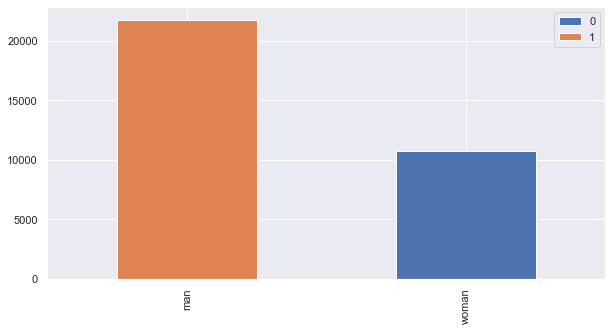

In [60]:
bar_chart('성별')

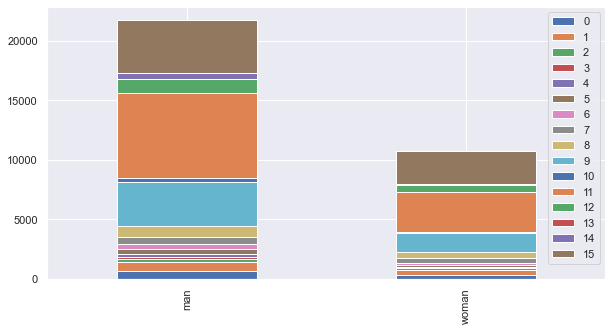

In [61]:
bar_chart('학력')

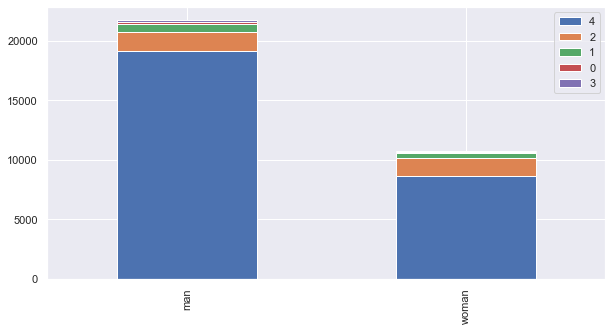

In [62]:
bar_chart('인종')

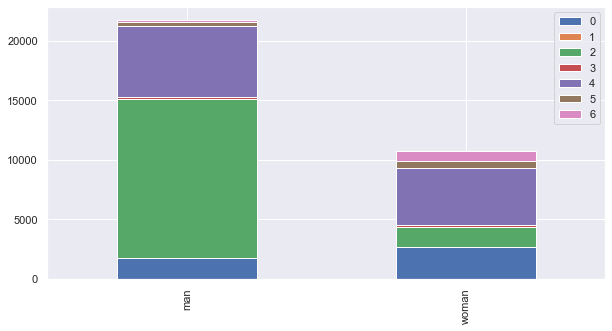

In [64]:
bar_chart('혼인 상태')

In [17]:
from sklearn.model_selection import train_test_split  

X = mdf.drop(['아이디','성별'], axis=1) 
Y = mdf['성별']                    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [19]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [20]:
display(tree.score(X_test, y_test))

0.8252057486795235

In [21]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [22]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [23]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [24]:
dtrain

In [25]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [26]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[13:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64492	eval-logloss:0.64506
[1]	train-logloss:0.60546	eval-logloss:0.60570
[2]	train-logloss:0.57262	eval-logloss:0.57296
[3]	train-logloss:0.54498	eval-logloss:0.54538
[4]	train-logloss:0.52128	eval-logloss:0.52190
[5]	train-logloss:0.50087	eval-logloss:0.50162
[6]	train-logloss:0.48319	eval-logloss:0.48418
[7]	train-logloss:0.46772	eval-logloss:0.46887
[8]	train-logloss:0.45416	eval-logloss:0.45544
[9]	train-logloss:0.44226	eval-logloss:0.44369
[10]	train-logloss:0.43000	eval-logloss:0.43152
[11]	train-logloss:0.42048	eval-logloss:0.42215
[12]	train-logloss:0.41183	eval-logloss:0

[162]	train-logloss:0.28402	eval-logloss:0.29666
[163]	train-logloss:0.28388	eval-logloss:0.29654
[164]	train-logloss:0.28384	eval-logloss:0.29653
[165]	train-logloss:0.28376	eval-logloss:0.29650
[166]	train-logloss:0.28372	eval-logloss:0.29649
[167]	train-logloss:0.28355	eval-logloss:0.29650
[168]	train-logloss:0.28343	eval-logloss:0.29647
[169]	train-logloss:0.28334	eval-logloss:0.29648
[170]	train-logloss:0.28329	eval-logloss:0.29645
[171]	train-logloss:0.28307	eval-logloss:0.29636
[172]	train-logloss:0.28296	eval-logloss:0.29632
[173]	train-logloss:0.28293	eval-logloss:0.29631
[174]	train-logloss:0.28280	eval-logloss:0.29622
[175]	train-logloss:0.28269	eval-logloss:0.29622
[176]	train-logloss:0.28246	eval-logloss:0.29603
[177]	train-logloss:0.28229	eval-logloss:0.29592
[178]	train-logloss:0.28223	eval-logloss:0.29590
[179]	train-logloss:0.28214	eval-logloss:0.29590
[180]	train-logloss:0.28206	eval-logloss:0.29594
[181]	train-logloss:0.28197	eval-logloss:0.29588
[182]	train-logloss:

[330]	train-logloss:0.27037	eval-logloss:0.29443
[331]	train-logloss:0.27031	eval-logloss:0.29442
[332]	train-logloss:0.27022	eval-logloss:0.29444
[333]	train-logloss:0.27017	eval-logloss:0.29445
[334]	train-logloss:0.27008	eval-logloss:0.29439
[335]	train-logloss:0.27003	eval-logloss:0.29439
[336]	train-logloss:0.27001	eval-logloss:0.29439
[337]	train-logloss:0.26992	eval-logloss:0.29438
[338]	train-logloss:0.26989	eval-logloss:0.29439
[339]	train-logloss:0.26982	eval-logloss:0.29437
[340]	train-logloss:0.26970	eval-logloss:0.29434
[341]	train-logloss:0.26967	eval-logloss:0.29433
[342]	train-logloss:0.26961	eval-logloss:0.29432
[343]	train-logloss:0.26960	eval-logloss:0.29431
[344]	train-logloss:0.26958	eval-logloss:0.29430
[345]	train-logloss:0.26952	eval-logloss:0.29433
[346]	train-logloss:0.26946	eval-logloss:0.29435
[347]	train-logloss:0.26941	eval-logloss:0.29435
[348]	train-logloss:0.26940	eval-logloss:0.29438
[349]	train-logloss:0.26939	eval-logloss:0.29438
[350]	train-logloss:

## 전개

In [27]:
new = pd.read_csv('human_new.csv', encoding='cp949')
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [28]:
new.isnull().sum()

아이디         0
나이          0
노동 계급     963
fnlwgt      0
학력          0
교육 수        0
혼인 상태       0
직업        966
관계          0
인종          0
자본 이득       0
자본 손실       0
주당 시간       0
모국        274
dtype: int64

In [29]:
X_train.shape

(24420, 17)

In [30]:
new.shape

(16281, 14)

### 파생변수 추가(예측후-전개)

In [31]:
new.loc[new['나이'] <= 37, '나이2'] = 'young'
new.loc[new['나이'] > 37, '나이2'] = 'old'

In [32]:
new.loc[(new['학력'] == ' HS-grad') | (new['학력'] == ' HS-grad') |
        (new['학력'] == ' Bachelors') | (new['학력'] == ' Masters') |
        (new['학력'] == ' Assoc-voc') | (new['학력'] == ' Assoc-acdm') |
        (new['학력'] == ' Prof-school') | (new['학력'] == ' Doctorate') |
        (new['학력'] == ' Preschool'), '학력2'] = 'h1'

new.loc[(new['학력'] == ' 11th') | (new['학력'] == ' 10th') |
        (new['학력'] == ' 7th-8th') | (new['학력'] == ' 9th') |
        (new['학력'] == ' 12th') | (new['학력'] == ' 5th-6th') |
        (new['학력'] == ' 1st-4th'), '학력2'] = 'h2'

In [33]:
# one-hot 인코딩
new_n2 = pd.get_dummies(new['나이2'])
new = pd.concat([new, new_n2], axis=1)
new

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,young,h2,0,1
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,old,h1,1,0
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,young,h1,0,1
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,old,NaN,1,0
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,young,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,young,NaN,0,1
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,young,h1,0,1
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,young,h1,0,1
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,old,h1,1,0


In [34]:
obj1 = ['노동 계급', '학력', '혼인 상태', '직업', '관계', 
        '인종', '모국', '나이2', '학력2']
new[obj1] = new[obj1].apply(lambda x: x.astype('category').cat.codes)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,1,1,0,1
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,0,0,1,0
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,0,-1,1,0
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,-1,0,1


In [35]:
new.isnull().sum()

아이디       0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
나이2       0
학력2       0
old       0
young     0
dtype: int64

In [36]:
dtest_ndf = xgb.DMatrix(data=new.iloc[:, 1:])

In [37]:
dtest_ndf = xgb.DMatrix(data=new.iloc[:, 1:])
new['성별'] = xgb_model.predict(dtest_ndf)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young,성별
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,1,1,0,1,0.736219
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,0,0,1,0,0.999954
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1,0.999782
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,0,-1,1,0,0.999905
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,-1,0,1,0.388036


In [38]:
new['성별']

0        0.736219
1        0.999954
2        0.999782
3        0.999905
4        0.388036
           ...   
16276    0.434125
16277    0.681846
16278    0.508356
16279    0.999923
16280    0.999823
Name: 성별, Length: 16281, dtype: float32

In [39]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.087 0.478 0.999 1.    0.986 0.548 0.597 0.286 0.1   0.315]


In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [41]:
get_clf_eval(y_test, preds)

오차행렬
[[2160  541]
 [ 723 4717]]
정확도: 0.8447, 정밀도: 0.8971, 재현율: 0.8671


In [42]:
ndf = new.copy()
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young,성별
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,1,1,0,1,0.736219
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,0,0,1,0,0.999954
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1,0.999782
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,0,-1,1,0,0.999905
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,-1,0,1,0.388036


In [43]:
#df_tr.loc[df_tr['노동 계급'] == ' ?', '노동 계급'] = np.nan
#ndf.loc[ndf['성별']==1,'성별'] = 'Male'
#ndf.loc[ndf['성별']==0,'성별'] = 'Female'
#ndf.head()

In [44]:
# 데이터 세트를 설명변수와 목적변수로 분할
X = np.array(ndf.drop('성별', axis=1))
Y = np.array(ndf['성별'])

In [45]:
# y가 1또는 0인 데이터의 건수를 카운트
print(np.sum(Y >=  0.768294), np.sum(Y <= 0.768294))

8141 8140


In [46]:
ndf['성별'].describe()

count    16281.000000
mean         0.666480
std          0.348195
min          0.000039
25%          0.371436
50%          0.768294
75%          0.999816
max          0.999993
Name: 성별, dtype: float64

In [47]:
print(np.sum(Y >= 0.768295), np.sum(Y < 0.768294))

8140 8140


In [48]:
#ndf[str].to_csv('sampleSubmission_human.csv', encoding='cp949', index=False)

In [49]:
str = ['아이디','성별']
ndf[str].head()

,아이디,성별
0,H00001,0.736219
1,H00002,0.999954
2,H00003,0.999782
3,H00004,0.999905
4,H00005,0.388036


In [50]:
#movie_rename = movie.rename(index={0:'아바타'}, columns={'color':'색깔','director_name':'감독이름'})
ndf_rename = ndf.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,나이2,학력2,old,young,SEX
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,1,1,0,1,0.736219
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,0,0,1,0,0.999954
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1,0.999782
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,0,-1,1,0,0.999905
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,-1,0,1,0.388036


In [51]:
str = ['ID','SEX']
ndf_rename[str].head()

,ID,SEX
0,H00001,0.736219
1,H00002,0.999954
2,H00003,0.999782
3,H00004,0.999905
4,H00005,0.388036


In [52]:
ndf_rename[str].to_csv('submission_human.csv', encoding='cp949', index=False)

In [53]:
ndf_rename.shape

(16281, 19)